In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read in dataset
df = pd.read_csv('dataset_p2.csv')

df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Outcomes_binary,Class
0,6,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,0
1,8,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,2,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,0
2,10,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,3,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,0
3,11,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,4,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,0
4,12,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,5,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,0


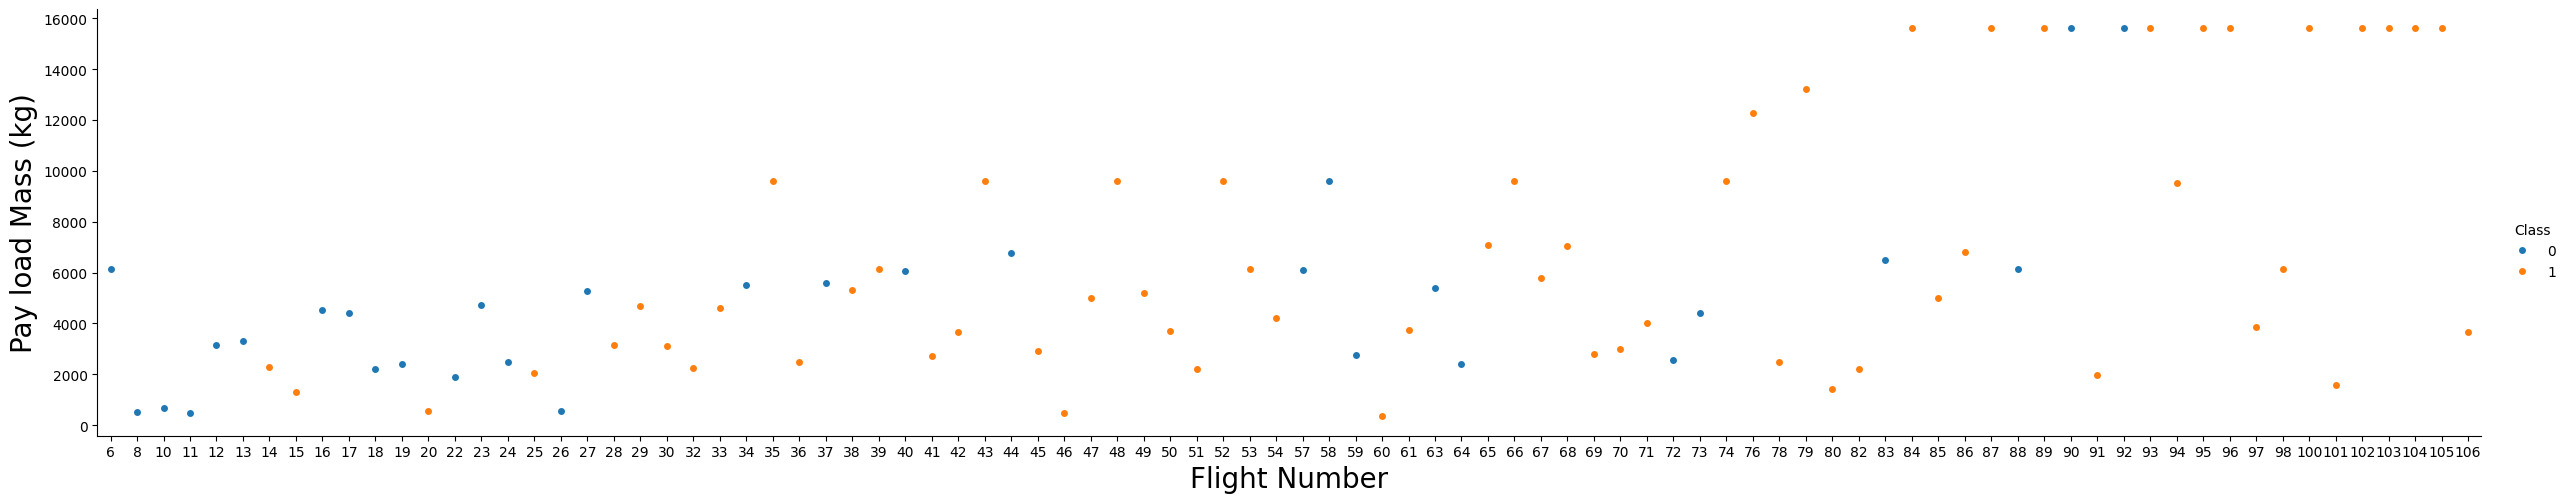

In [4]:
# FlightNumber (indicating the continuous launch attempts.) and Payload variables would affect the launch outcome.
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

### TASK 1: Visualize the relationship between Flight Number and Launch Site

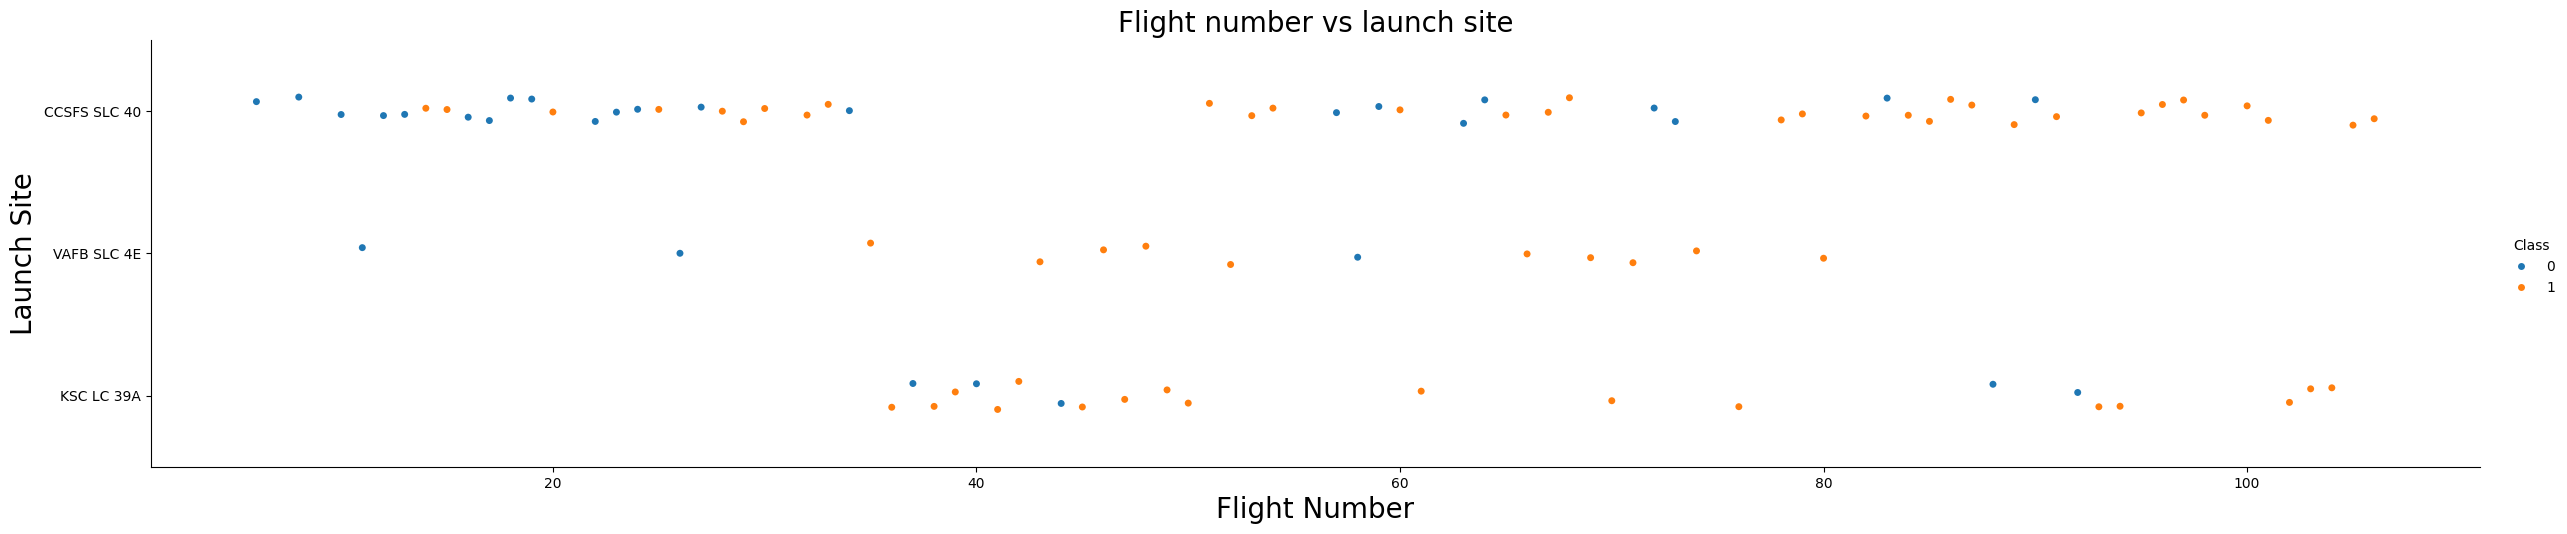

In [7]:
sns.catplot(data=df, x='FlightNumber', y='LaunchSite', hue='Class', aspect = 5)
plt.title('Flight number vs launch site', fontsize=20)
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Launch Site', fontsize=20)
plt.show()

Launch Site VAFB SLC 4E had the fewest fligths <br>
the last 8 flights for CCSF5 SLC 40 were all success

### TASK 2: Visualize the relationship between Payload Mass and Launch Site

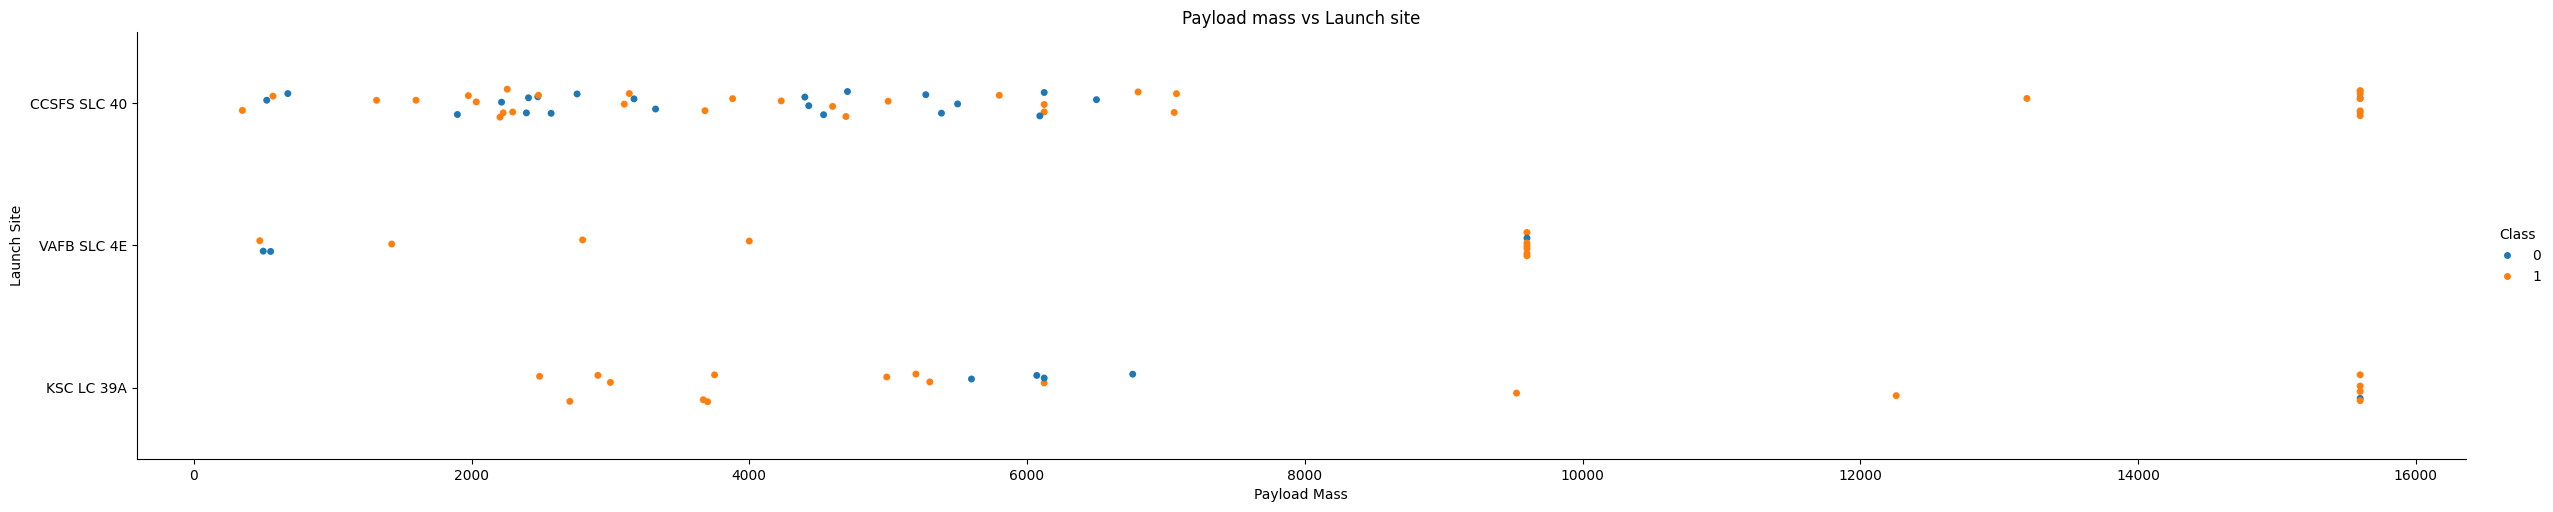

In [14]:
sns.catplot(data=df, x='PayloadMass', y='LaunchSite', hue='Class', aspect=5)
plt.title('Payload mass vs Launch site')
plt.xlabel('Payload Mass')
plt.ylabel('Launch Site')
plt.show()

TCCSFS SLC 40 and KSC LC 39 A have multiple successes at higher than 10000 payload <br>
VAFB SLC 4E has most of their successful launches at just below 10000 payload

### TASK  3: Visualize the relationship between success rate of each orbit type


In [29]:
df_outcome = df.groupby('Orbit')['Class'].mean().reset_index()
df_outcome = df_outcome.sort_values('Class', ascending=False, axis=0)

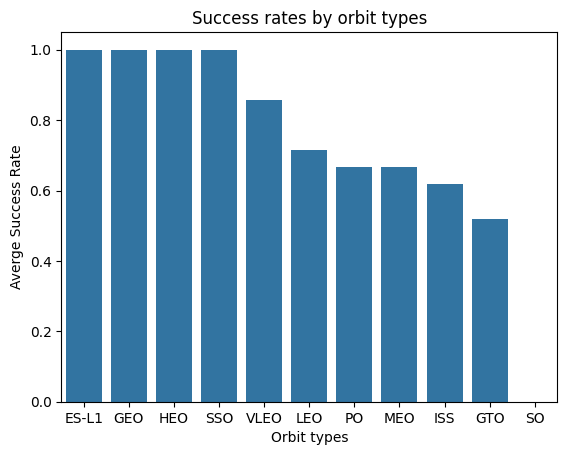

In [30]:
sns.barplot(data=df_outcome, x='Orbit', y='Class')
plt.title('Success rates by orbit types')
plt.xlabel('Orbit types')
plt.ylabel('Averge Success Rate')
plt.show()

Orbit type SO has an Average Sucess Rate of 0 <br>
Highest Success Rate ES-L1, GEO, HEO

### TASK  4: Visualize the relationship between FlightNumber and Orbit type


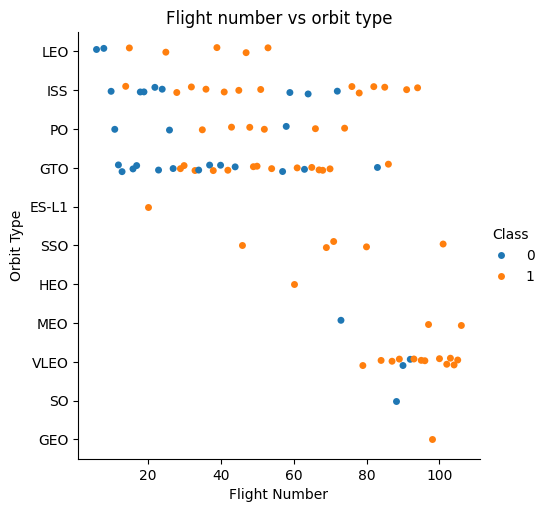

In [31]:
sns.catplot(data=df, x='FlightNumber', y='Orbit', hue='Class')
plt.title('Flight number vs orbit type')
plt.xlabel('Flight Number')
plt.ylabel('Orbit Type')
plt.show()

Flight SSO had Fewer flights but all successfull <br>
A majority of the fligts occured in the orbit typ efor VLEO, GTO, and ISS

### TASK  5: Visualize the relationship between Payload Mass and Orbit type

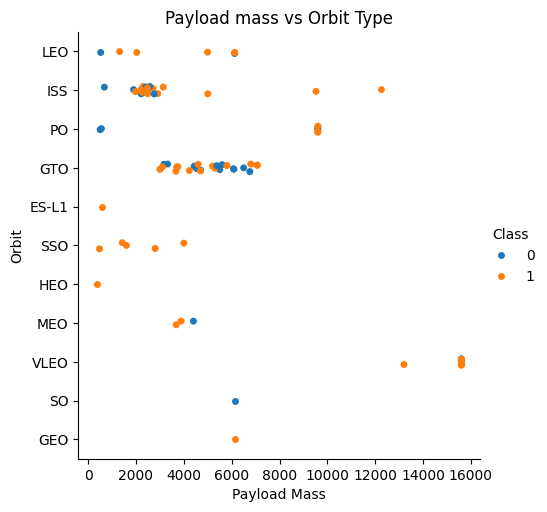

In [32]:
sns.catplot(data=df, x='PayloadMass', y='Orbit', hue='Class')
plt.title('Payload mass vs Orbit Type')
plt.xlabel('Payload Mass')
plt.ylabel('Orbit')
plt.show()

VLEO had the highest payload with Successes <br>
SSO has all successes but Payload was all less then 6000 <br>
GTO was was clustered between 2000 and 8000 payload mass with varying success and failures


### TASK  6: Visualize the launch success yearly trend

In [38]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Year'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Outcomes_binary,Class,Year
0,6,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,0,2010
1,8,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,2,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,0,2012
2,10,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,3,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,0,2013
3,11,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,4,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,0,2013
4,12,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,5,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,0,2013


In [ ]:
df_year = df.groupby('Year')['Class'].mean().reset_index()
df_year

Year
2010    0.000000
2012    0.000000
2013    0.000000
2014    0.333333
2015    0.333333
2016    0.625000
2017    0.833333
2018    0.611111
2019    0.900000
2020    0.842105
Name: Class, dtype: float64

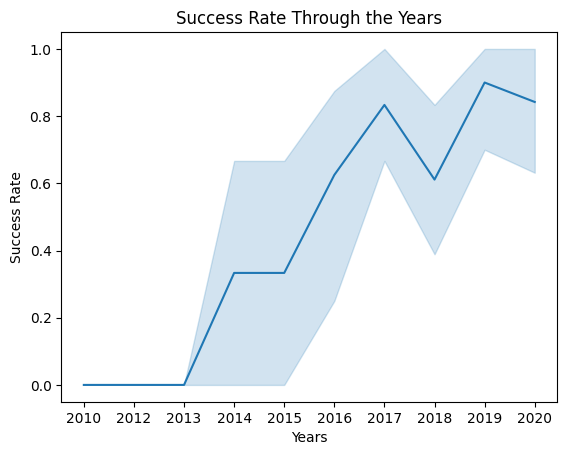

In [41]:
sns.lineplot(data=df, x='Year', y='Class')
plt.title('Success Rate Through the Years')
plt.xlabel('Years')
plt.ylabel('Success Rate')
plt.show()

The trend shows the succession rate increases as the years go on
Success rate fall during 2018

In [46]:
# Features list for model
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,6,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,8,525.000000,LEO,CCSFS SLC 40,2,False,False,False,NaN,1.0,0,B0005
2,10,677.000000,ISS,CCSFS SLC 40,3,False,False,False,NaN,1.0,0,B0007
3,11,500.000000,PO,VAFB SLC 4E,4,False,False,False,NaN,1.0,0,B1003
4,12,3170.000000,GTO,CCSFS SLC 40,5,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns

In [49]:
features_one_hot = pd.get_dummies(data=features[['Orbit', 'LaunchSite', 'LandingPad', 'Serial']], dtype=int)
features_one_hot.head()

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
features = features.join(features_one_hot)
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,6,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,...,0,0,0,0,0,0,0,0,0,0
1,8,525.000000,LEO,CCSFS SLC 40,2,False,False,False,NaN,1.0,...,0,0,0,0,0,0,0,0,0,0
2,10,677.000000,ISS,CCSFS SLC 40,3,False,False,False,NaN,1.0,...,0,0,0,0,0,0,0,0,0,0
3,11,500.000000,PO,VAFB SLC 4E,4,False,False,False,NaN,1.0,...,0,0,0,0,0,0,0,0,0,0
4,12,3170.000000,GTO,CCSFS SLC 40,5,False,False,False,NaN,1.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,6,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,...,0,0,0,0,0,0,0,0,0,0
1,8,525.000000,LEO,CCSFS SLC 40,2,False,False,False,NaN,1.0,...,0,0,0,0,0,0,0,0,0,0
2,10,677.000000,ISS,CCSFS SLC 40,3,False,False,False,NaN,1.0,...,0,0,0,0,0,0,0,0,0,0
3,11,500.000000,PO,VAFB SLC 4E,4,False,False,False,NaN,1.0,...,0,0,0,0,0,0,0,0,0,0
4,12,3170.000000,GTO,CCSFS SLC 40,5,False,False,False,NaN,1.0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
features.to_csv('dataset_p3.csv', index=False)